In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# loading data from the csv files
exercise_data = pd.read_csv("exercise.csv")
calories_data = pd.read_csv("calories.csv")

In [3]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
data = exercise_data.assign(Calories = calories_data.Calories)

In [6]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
data.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Duration'>

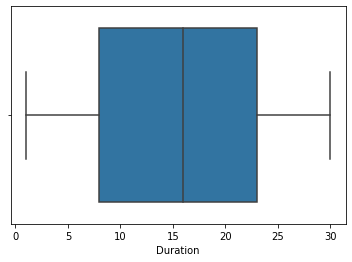

In [9]:
# Duration, Heart Rate and Body Temp has direct corelation with the colories burn. So checking for outliers in these.
sns.boxplot(data['Duration'])

/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Heart_Rate'>

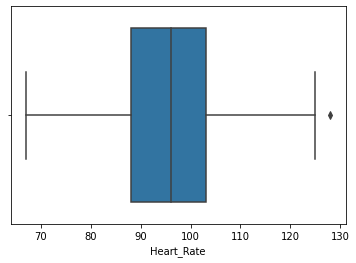

In [10]:
sns.boxplot(data['Heart_Rate'])

/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Body_Temp'>

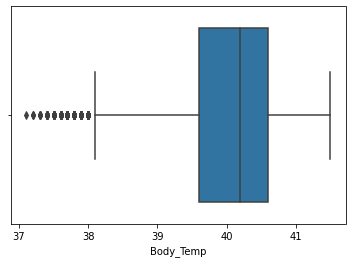

In [11]:
sns.boxplot(data['Body_Temp'])

In [12]:
#One hot encoding for gender
one_hot = pd.get_dummies(exercise_data['Gender'])
exercise_data = exercise_data.join(one_hot)

In [13]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,1,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,1,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,1,0


In [14]:
#Removed user id from the data set as this is not required for prediction
exercise_data.drop(columns=['User_ID', 'Gender'], inplace=True)
calories_data.drop(columns=['User_ID'], inplace=True)

In [15]:
exercise_data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male
0,68,190.0,94.0,29.0,105.0,40.8,0,1
1,20,166.0,60.0,14.0,94.0,40.3,1,0
2,69,179.0,79.0,5.0,88.0,38.7,0,1
3,34,179.0,71.0,13.0,100.0,40.5,1,0
4,27,154.0,58.0,10.0,81.0,39.8,1,0


In [16]:
from sklearn.model_selection import train_test_split

#Split Training and testing data set
X_train, X_test, y_train, y_test = train_test_split(exercise_data, calories_data, test_size=0.2, random_state=42)

In [17]:
X_train.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male
9839,37,179.0,77.0,7.0,81.0,39.5,0,1
9680,23,195.0,87.0,26.0,110.0,40.5,0,1
7093,33,181.0,77.0,12.0,88.0,40.1,0,1
11293,66,156.0,54.0,9.0,77.0,39.5,1,0
820,32,144.0,49.0,5.0,90.0,39.0,1,0


In [18]:
# create models for the Regression
regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/positra/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22

,MAE,MSE,R2-score
Linear Regression,8.441514,131.995746,0.967294
Logistic Regression,15.161000,443.325667,0.890151
Decision Tree,3.346667,26.874000,0.993341
Random Forest,2.014967,9.403050,0.997670
Support Vector Machines,52.574407,4082.396486,-0.011548
K-nearest Neighbors,4.997133,49.545880,0.987723
XGBoost,1.515464,4.999102,0.998761


In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [ 0.01, 0.03, 0.05, 0.07, 0.09],
              'max_depth': [6,7,8,9, 10],
              'n_estimators': [300, 500,700]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 3,
                        verbose=True)

xgb_grid.fit(exercise_data,calories_data)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 14.7min
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed: 17.7min finished


0.9994169886267315
{'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 700}


In [26]:
# Creating model with the best params
model = XGBRegressor(max_depth=6, learning_rate=0.09, n_estimators = 700)

model.fit(X_train,y_train)
pred = model.predict(X_test)

print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.8956754546562831
1.7034022228642562
0.9995779261063334


In [27]:
pd.DataFrame(pred)

,0
0,173.297653
1,190.754837
2,53.773468
3,160.183105
4,226.214539
...,...
2995,184.278000
2996,54.375473
2997,121.303955
2998,19.652151


In [28]:
y_test

,Calories
11499,173.0
6475,189.0
13167,53.0
862,161.0
5970,226.0
...,...
6216,186.0
3585,53.0
10023,120.0
14044,20.0


In [29]:
X_test.iloc[[2]]

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male
13167,58,176.0,77.0,11.0,90.0,40.0,0,1


In [30]:
model.predict(X_test.iloc[[2]])

array([53.773468], dtype=float32)